In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import os
import zipfile

In [2]:
# 1. Gather

In [3]:
# Datasets mapping
datasets_names = {
    2011: "2011 Stack Overflow Survey Results.csv",
    2012: "2012 Stack Overflow Survey Results.csv",
    2013: "2013 Stack Overflow Survey Responses.csv",
    2016: "2016 Stack Overflow Survey Responses.csv",
    2017: "survey_results_public_2017.csv",
    2018: "survey_results_public_2018.csv",
    2019: "survey_results_public_2019.csv",
    2020: "survey_results_public_2020.csv",
}

DATA_FOLDER = "./data"
df_map = {}

for year, filename in datasets_names.items():
    full_path = os.path.join(DATA_FOLDER, filename)
    if not os.path.exists(full_path):
        if os.path.exists(full_path + ".zip"):
            with zipfile.ZipFile(full_path + ".zip", 'r') as zip_ref:
                zip_ref.extractall(DATA_FOLDER)
        else:
            print("Failed to load dataset at %s" % full_path)
            continue
    try:
        df = pd.read_csv(full_path)
    except UnicodeDecodeError:
        df = pd.read_csv(full_path, encoding="ISO-8859-1")
    except Exception as e:
        print("Failed to load dataset at %s" % full_path)
        continue
    df_map[year] = df
            
print("Finished loading data")  

/Users/lca/Development/Environments/udacity/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (46,48,62) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/lca/Development/Environments/udacity/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Finished loading data


In [4]:
# Inter-dataset matching
satisfaction_key_map = {
    2011: "Please rate your job/career satisfaction",
    2012: "What best describes your career / job satisfaction? ",
    2013: "What best describes your career / job satisfaction?",
    2016: "job_satisfaction",
    2017: "JobSatisfaction",
    2018: "JobSatisfaction",
    2019: "JobSat",
    2020: "JobSat",
}
salary_key_map = {
    2011: "Including bonus, what is your annual compensation in USD?",
    2012: "Including bonus, what is your annual compensation in USD?",
    2013: "Including bonus, what is your annual compensation in USD?",
    2018: "ConvertedSalary",
    2019: "ConvertedComp",
    2020: "ConvertedComp",
}

In [5]:
# Category to numerical mapping.
# Satisfaction was converted to a 0-10 scoring system.
satisfaction_map = {
    "Extremely satisfied": 10,
    "So happy it hurts": 10,
    "Love my job": 10,
    "I love my job": 10,
    "Very satisfied": 8,
    "Moderately satisfied": 7,
    "I enjoy going to work": 7,
    "Slightly satisfied": 6,
    "I'm somewhat satisfied with my job": 6,
    "Neither satisfied nor dissatisfied": 5,
    "I'm neither satisfied nor dissatisfied": 5,
    "It pays the bills": 5,
    "Its a paycheck": 5,
    "It's a paycheck": 5,
    "Slightly dissatisfied": 4,
    "I'm somewhat dissatisfied with my job": 4,
    "Moderately dissatisfied": 3,
    "Very dissatisfied": 2,
    "I'm not happy in my job": 2,
    "Extremely dissatisfied": 0,
    "Hate my job": 0,
    "I hate my job": 0,
    "FML": 0,
}

# Salary ranges were converted to averages and at both extremes converted to an extra tick in each 
# direction (considering $10000 ticks)
salary_map = {
    "<$20,000": 10000,
    "$20,000 - $40,000": 30000,
    "$40,000 - $60,000": 50000,
    "$60,000 - $80,000": 70000,
    "$80,000 - $100,000": 90000,
    "$100,000 - $120,000": 110000,
    "$120,000 - $140,000": 130000,
    ">$140,000": 150000,
}

In [6]:
# Ignored entries. These entries don't have a good correspondence to a numerical value.
satisfaction_ignored = [
    "Response",
    "I wish I had a job!",
    "I don't have a job",
    "Other (please specify)",
]
salary_ignored = ["Rather not say", "Student / Unemployed", "Response"]

In [7]:
# Support functions
def plot_mean(columns, labels, _label=""):
    """
    Plots the mean of each provided column
    :param columns: Columns containing numerical data
    :param labels: Labels for each column
    """
    columns_mean = [col.mean() for col in columns]
    plt.plot(labels, columns_mean, label=_label)


def cat_to_num(df_col, cat_map, cat_ignored=[]):
    """
    Converts categorical into numerical data.
    :param df_col: Dataframe column containing categorical data
    :param cat_map: Categorical to numerical mapping
    :param cat_ignored: Ignored categorical entries
    :return: Dataframe column with numerical data
    """
    for ignored in cat_ignored:
        df_col = df_col[df_col != ignored]
    df_col = df_col.replace(cat_map)
    return df_col

In [8]:
# 2. Assess
# Question 1: Does satisfaction increase with salary over time?

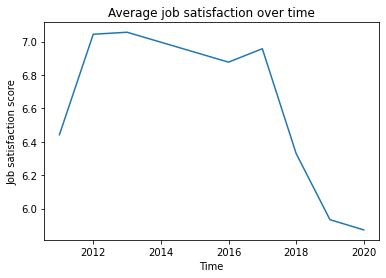

In [44]:
# Plot average satisfaction over time (0-10)
satisfaction_cat_map = {}
for year in df_map:
    if year in satisfaction_key_map:
        satisfaction_cat = cat_to_num(
            df_map[year][satisfaction_key_map[year]],
            satisfaction_map,
            satisfaction_ignored,
        )
        satisfaction_cat_map[year] = satisfaction_cat

plot_mean(list(satisfaction_cat_map.values()), list(satisfaction_cat_map.keys()))
plt.title("Average job satisfaction over time")
plt.ylabel("Job satisfaction score")
plt.xlabel("Time")
plt.show()

In [10]:
# The above plot shows that job satisfaction has been declining for a few years

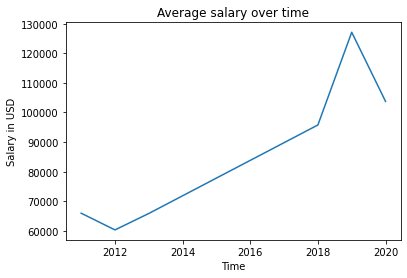

In [45]:
# Plot average salary over time
salary_cat_map = {}
for year in df_map:
    if year in salary_key_map:
        salary_cat = cat_to_num(
            df_map[year][salary_key_map[year]], salary_map, salary_ignored
        )
        salary_cat_map[year] = salary_cat

plot_mean(list(salary_cat_map.values()), list(salary_cat_map.keys()))
plt.title("Average salary over time")
plt.ylabel("Salary in USD")
plt.xlabel("Time")
plt.show()

In [12]:
# Interestingly, the average salary has steadily increased, getting into 6 figures territory
# around 2018.

# Compared with the job satisfaction trend, this last plot suggests that higher salaries don't
# imply higher job satisfaction.

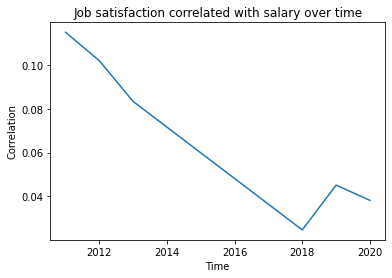

In [46]:
satisfaction_salary_corr = {}
for year in df_map:
    if year in salary_key_map and year in satisfaction_key_map:
        salary_cat = cat_to_num(
            df_map[year][salary_key_map[year]], salary_map, salary_ignored
        )
        satisfaction_cat = cat_to_num(
            df_map[year][satisfaction_key_map[year]],
            satisfaction_map,
            satisfaction_ignored,
        )
        satisfaction_salary_corr[year] = satisfaction_cat.corr(salary_cat)

plot_mean(
    list(satisfaction_salary_corr.values()), list(satisfaction_salary_corr.keys())
)
plt.title("Job satisfaction correlated with salary over time")
plt.ylabel("Correlation")
plt.xlabel("Time")
plt.show()

In [14]:
# Looking at the above plot, we can confirm that the correlation between salary and job
# satisfaction has been declining since the first survey dataset used in this study.

# Question 2: Can it be that this is only true for lower salaries? If we only take the job satisfaction
# evaluation from high paying employees, will the trends be any different?

In [15]:
# Support functions
def satisfaction_high_salary(
    _df_source,
    salary_key,
    satisfaction_key,
    _salary_map,
    _salary_ignored,
    salary_threshold,
):
    """
    Filters the dataframe to only contain high salary entries
    :param _df_source: Source dataframe
    :param salary_key: Column key for this dataframe's salary column
    :param satisfaction_key: Column key for this dataframe's satisfaction column
    :param _salary_map: Categorical to numerical salary mapping
    :param _salary_ignored: Ignored salary categories
    :param salary_threshold: Salary threshold
    :return:
    """
    df_copy = _df_source.copy()
    df_copy = df_copy.dropna(subset=[salary_key, satisfaction_key])
    df_copy = df_copy[~df_copy[salary_key].isin(_salary_ignored)]
    df_copy[salary_key] = cat_to_num(df_copy[salary_key], _salary_map, _salary_ignored)
    df_copy = df_copy[df_copy[salary_key] > salary_threshold]
    return df_copy

In [16]:
# 3. Clean / Analyze

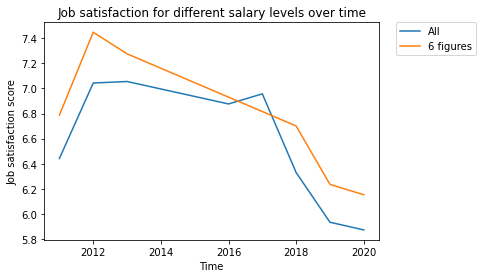

In [47]:
# Plot satisfaction for specific salary levels

# We'll need to make sure the entries we're using include values for both salary 
# and job satisfaction and we'll subset the data to only include entries with 
# salaries above a certain threshold. This is more accurate than imputting 
# missing values.

filtered_all = {}
for year, df_source in df_map.items():
    if year not in salary_key_map or year not in satisfaction_key_map:
        continue
    result = satisfaction_high_salary(
        df_source,
        salary_key_map[year],
        satisfaction_key_map[year],
        salary_map,
        salary_ignored,
        100000,
    )
    filtered_all[year] = result

satisfaction_all = {}
for year in filtered_all:
    result = cat_to_num(
        filtered_all[year][satisfaction_key_map[year]],
        satisfaction_map,
        satisfaction_ignored,
    )
    satisfaction_all[year] = result

plot_mean(list(satisfaction_cat_map.values()), list(satisfaction_cat_map.keys()), "All")
plot_mean(list(satisfaction_all.values()), list(satisfaction_all.keys()), "6 figures")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Job satisfaction for different salary levels over time")
plt.ylabel("Job satisfaction score")
plt.xlabel("Time")
plt.show()

In [18]:
# The above plot shows that the job satisfaction trend is very similar between high paying jobs 
# and the overall average.

# Question 3: Then, can we perhaps find a correlation between job satisfaction and healthy life styles?

In [19]:
# Support functions
def corr_satisfaction(_df_source, satisfaction_key, compare_key):
    """
    Find correlations with job satisfaction
    :param _df_source: Source dataframe
    :param satisfaction_key: Column key for this dataframe's job satisfaction
    :param compare_key: Column key to be correlated with job satisfaction
    :return: Correlation object between both provided columns
    """
    df_drop = _df_source.dropna(subset=[satisfaction_key, compare_key])
    sat_num = cat_to_num(df_drop[satisfaction_key], satisfaction_map, satisfaction_ignored)
    dummies = pd.get_dummies(df_drop[compare_key], drop_first=True, dummy_na=False)
    return dummies.corrwith(sat_num).sort_values()

In [20]:
# 4. Model / Visualize

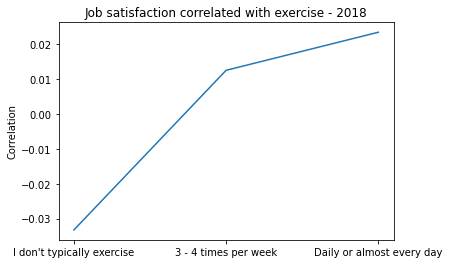

In [48]:
# Job satisfaction and exercise
c = corr_satisfaction(df_map[2018], "JobSatisfaction", "Exercise")
plt.plot(c)
plt.title("Job satisfaction correlated with exercise - 2018")
plt.ylabel("Correlation")
plt.show()

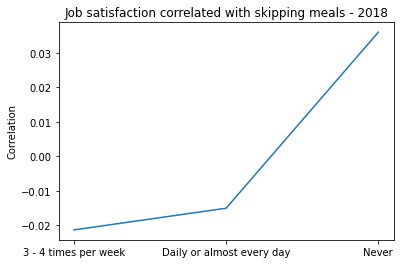

In [49]:
# Job satisfaction and skipping meals
c = corr_satisfaction(df_map[2018], "JobSatisfaction", "SkipMeals")
plt.plot(c)
plt.title("Job satisfaction correlated with skipping meals - 2018")
plt.ylabel("Correlation")
plt.show()

In [23]:
# Job satisfaction and weekly work hours
df_drop = df_map[2020].dropna(subset=['JobSat', 'WorkWeekHrs'])
sat_num = cat_to_num(df_drop['JobSat'], satisfaction_map, satisfaction_ignored)
new_df = pd.DataFrame([sat_num, df_drop['WorkWeekHrs']])
new_df = new_df.transpose()
new_df_pos = new_df[new_df['JobSat'] > 5]
new_df_neg = new_df[new_df['JobSat'] <= 5]

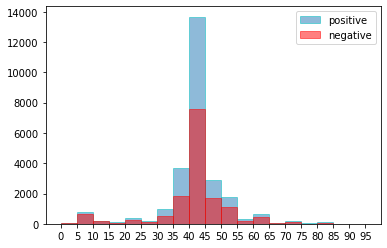

In [24]:
bins = [i * 5 for i in range(20)]
plt.hist(new_df_pos['WorkWeekHrs'], bins=bins, edgecolor="c", alpha=0.5, label='positive')
plt.hist(new_df_neg['WorkWeekHrs'], bins=bins, edgecolor="r",color='r', alpha=0.5, label='negative')
plt.legend(loc='upper right')
plt.xticks(bins)
plt.show()

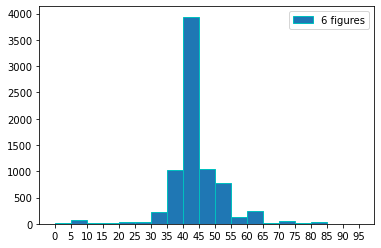

In [25]:
# Average income and weekly work hours
df_drop = df_map[2020].dropna(subset=['ConvertedComp', 'WorkWeekHrs'])
sat_num = cat_to_num(df_drop['ConvertedComp'], satisfaction_map, satisfaction_ignored)
new_df = pd.DataFrame([sat_num, df_drop['WorkWeekHrs']])
new_df = new_df.transpose()
new_df_high = new_df[new_df['ConvertedComp'] > 100000]
bins = [i * 5 for i in range(20)]
plt.hist(new_df_high['WorkWeekHrs'], bins=bins, edgecolor="c", alpha=1, label='6 figures')
plt.legend(loc='upper right')
plt.xticks(bins)
plt.show()

In [26]:
# Number of respondents with 6 figure salaries in 2020
new_df_high.count()

ConvertedComp    7661
WorkWeekHrs      7661
dtype: int64

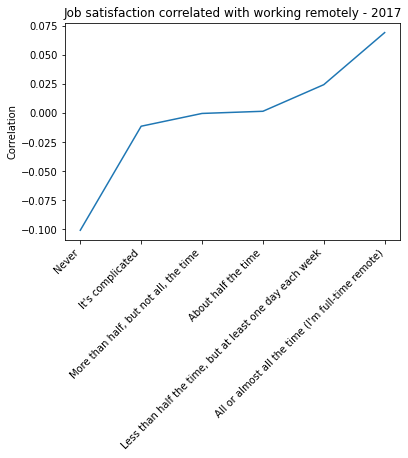

In [50]:
# Job satisfaction and working from home
c = corr_satisfaction(df_map[2017], 'JobSatisfaction', 'HomeRemote')
plt.plot(c)
plt.xticks(rotation=45, ha="right")
plt.title("Job satisfaction correlated with working remotely - 2017")
plt.ylabel("Correlation")
plt.show()

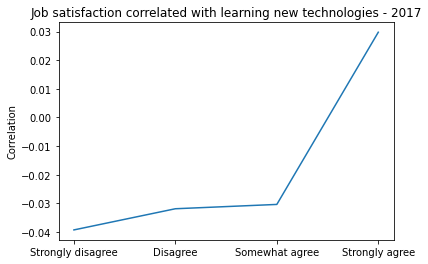

In [51]:
# Job satisfaction and learning new tech
c = corr_satisfaction(df_map[2017], 'JobSatisfaction', 'LearningNewTech')
plt.plot(c)
plt.title("Job satisfaction correlated with learning new technologies - 2017")
plt.ylabel("Correlation")
plt.show()

In [29]:
# The previous charts indicate that good habits and healthy lifestyles are generally associated 
# with higher job satisfaction.